In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
files = os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset")
class_image = []
for x in files:
  output = x.split('.')[0]
  if(output == 'Abhishek'):
    class_image.append('Abhishek')

  elif(output == 'Benoi'):
    class_image.append('Benoi')

  elif(output == 'Divya'):
    class_image.append('Divya')

  elif(output == 'Maziya'):
    class_image.append('Maziya')   

  elif(output == 'Purvika'):
    class_image.append('Purvika')

  elif(output == 'Rahul'):
    class_image.append('Rahul')
    
  elif(output == 'Renesa'):
    class_image.append('Renesa')
    
  elif(output == 'Sagarika'):
    class_image.append('Sagarika')

  elif(output == 'Samyak'):
    class_image.append('Samyak')
        
  elif(output == 'Sayali'):
    class_image.append('Sayali')
        
  elif(output == 'Sharvari'):
    class_image.append('Sharvari')
        
  elif(output == 'Shivani'):
    class_image.append('Shivani')
        
  elif(output == 'Shraddha'):
    class_image.append('Shraddha')
    
  elif(output == 'Shubhankar'):
    class_image.append('Shubhankar')

  elif(output == 'Rutuja'):
    class_image.append('Rutuja')

  elif(output == 'Bhakti'):
    class_image.append('Bhakti')

  elif(output == 'Siddhika'):
    class_image.append('Siddhika')  

  elif(output == 'Shubham'):
    class_image.append('Shubham')

  elif(output == 'Vishal'):
    class_image.append('Vishal')  

  else:
    class_image.append('Unzela')
  

df = pd.DataFrame({'filename':files, 'class':class_image})

In [ ]:
df

,filename,class
0,Shubham.23.jpg,Shubham
1,Shubham.24.jpg,Shubham
2,Shubham.25.jpg,Shubham
3,Shubham.12.jpg,Shubham
4,Shubham.19.jpg,Shubham
...,...,...
495,Bhakti.14.jpg,Bhakti
496,Bhakti.12.jpg,Bhakti
497,Bhakti.13.jpg,Bhakti
498,Bhakti.11.jpg,Bhakti


In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=0)
total_train = train.shape[0]
total_test = test.shape[0]

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_gen.flow_from_dataframe(
    train, 
    "/content/drive/My Drive/Colab Notebooks/Dataset", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 350 validated image filenames belonging to 20 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    test, 
    "/content/drive/My Drive/Colab Notebooks/Dataset", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 150 validated image filenames belonging to 20 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#also try rmsprop, adam
# model.summary()

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
epochs=250
history = model.fit(train_generator,
                    epochs=250,
                    validation_data=validation_generator)

Epoch 1/250
24/24 [==============================] - 30s 1s/step - loss: 3.0228 - accuracy: 0.0486 - val_loss: 2.9984 - val_accuracy: 0.0467
Epoch 2/250
24/24 [==============================] - 29s 1s/step - loss: 2.9961 - accuracy: 0.0514 - val_loss: 3.0002 - val_accuracy: 0.0200
Epoch 3/250
24/24 [==============================] - 29s 1s/step - loss: 2.9965 - accuracy: 0.0829 - val_loss: 3.0034 - val_accuracy: 0.0333
Epoch 4/250
24/24 [==============================] - 29s 1s/step - loss: 2.9930 - accuracy: 0.0600 - val_loss: 3.0064 - val_accuracy: 0.0200
Epoch 5/250
24/24 [==============================] - 29s 1s/step - loss: 2.9916 - accuracy: 0.0543 - val_loss: 3.0092 - val_accuracy: 0.0200
Epoch 6/250
24/24 [==============================] - 30s 1s/step - loss: 2.9923 - accuracy: 0.0600 - val_loss: 3.0067 - val_accuracy: 0.0200
Epoch 7/250
24/24 [==============================] - 30s 1s/step - loss: 2.9921 - accuracy: 0.0543 - val_loss: 3.0121 - val_accuracy: 0.0200
Epoch 8/250
2

In [ ]:
  model.save("face_detection.h5")

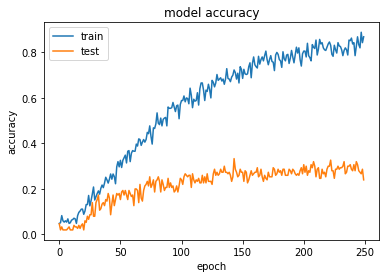

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

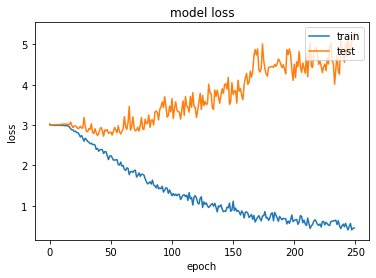

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(train_generator)

24/24 [==============================] - 21s 888ms/step - loss: 0.6331 - accuracy: 0.8057


[0.6331229209899902, 0.8057143092155457]

In [ ]:
model.evaluate(validation_generator)

10/10 [==============================] - 7s 726ms/step - loss: 5.3015 - accuracy: 0.2400


[5.30146598815918, 0.23999999463558197]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(validation_generator)

In [ ]:
import numpy as np
test_pred = np.argmax(pred, axis=-1)

In [ ]:
result = confusion_matrix(validation_generator.classes, test_pred)
print("Confusion Matrix: ")
print(result)

Confusion Matrix: 
[[0 0 0 0 0 2 0 0 1 0 0 0 1 1 0 0 0 0 2 0]
 [1 0 0 2 0 0 0 0 0 0 1 1 2 1 0 0 0 0 2 0]
 [1 0 0 2 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1]
 [0 0 0 1 2 1 0 0 2 0 0 0 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 1 2 1 0 1 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 3 0 0 0 0 0 2 1 0 0 0 1]
 [2 0 1 1 0 0 1 0 0 0 0 0 1 2 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
 [2 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 4 1]
 [0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [3 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 2 0]
 [2 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0]
 [1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0]
 [2 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1]]


In [ ]:
print(classification_report(validation_generator.classes, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         9
           3       0.08      0.14      0.10         7
           4       0.50      0.22      0.31         9
           5       0.00      0.00      0.00         5
           6       0.10      0.12      0.11         8
           7       0.50      0.14      0.22         7
           8       0.08      0.33      0.12         3
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         4
          12       0.10      0.20      0.13         5
          13       0.10      0.08      0.09        12
          14       0.11      0.17      0.13         6
          15       0.00      0.00      0.00        11
          16       0.12      0.14      0.13         7
          17       0.00    